# <span style="font-variant:small-caps;"><font color=#DAA6E4 size=12>Background and Sensitivity Estimation</font></span>

This notebook should present the distributions of signal and data within control regions.

[This link](https://cms-analysis.github.io/HiggsAnalysis-CombinedLimit/part2/settinguptheanalysis/) will show you how to format the data cards and enter them into HiggsCombine.

In [2]:
from matplotlib.ticker import FormatStrFormatter
import vector

In [3]:
mpl.rcParams['axes.formatter.limits'] = (-4,4)

## 1. Load signal and data events

In [4]:
from utils.fileUtils.sr import NMSSM_MX_450_MY_300, NMSSM_MX_500_MY_300, NMSSM_MX_600_MY_300, NMSSM_MX_600_MY_400, NMSSM_MX_700_MY_300, NMSSM_MX_700_MY_400, NMSSM_MX_700_MY_500

In [5]:
datTree = Tree(JetHT_Data_UL)

In [6]:
H1_b1 = vector.obj(
    pt=datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0][:,0], 
    eta=datTree.t6_jet_eta[datTree.t6_jet_higgsIdx == 0][:,0], 
    phi=datTree.t6_jet_phi[datTree.t6_jet_higgsIdx == 0][:,0], 
    m=datTree.t6_jet_m[datTree.t6_jet_higgsIdx == 0][:,0])
H1_b2 = vector.obj(
    pt=datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0][:,1], 
    eta=datTree.t6_jet_eta[datTree.t6_jet_higgsIdx == 0][:,1], 
    phi=datTree.t6_jet_phi[datTree.t6_jet_higgsIdx == 0][:,1], 
    m=datTree.t6_jet_m[datTree.t6_jet_higgsIdx == 0][:,1])
H2_b1 = vector.obj(
    pt=datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1][:,0], 
    eta=datTree.t6_jet_eta[datTree.t6_jet_higgsIdx == 1][:,0], 
    phi=datTree.t6_jet_phi[datTree.t6_jet_higgsIdx == 1][:,0], 
    m=datTree.t6_jet_m[datTree.t6_jet_higgsIdx == 1][:,0])
H2_b2 = vector.obj(
    pt=datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1][:,1], 
    eta=datTree.t6_jet_eta[datTree.t6_jet_higgsIdx == 1][:,1], 
    phi=datTree.t6_jet_phi[datTree.t6_jet_higgsIdx == 1][:,1], 
    m=datTree.t6_jet_m[datTree.t6_jet_higgsIdx == 1][:,1])
H3_b1 = vector.obj(
    pt=datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2][:,0], 
    eta=datTree.t6_jet_eta[datTree.t6_jet_higgsIdx == 2][:,0], 
    phi=datTree.t6_jet_phi[datTree.t6_jet_higgsIdx == 2][:,0], 
    m=datTree.t6_jet_m[datTree.t6_jet_higgsIdx == 2][:,0])
H3_b2 = vector.obj(
    pt=datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2][:,1], 
    eta=datTree.t6_jet_eta[datTree.t6_jet_higgsIdx == 2][:,1], 
    phi=datTree.t6_jet_phi[datTree.t6_jet_higgsIdx == 2][:,1], 
    m=datTree.t6_jet_m[datTree.t6_jet_higgsIdx == 2][:,1])

X = H1_b1 + H1_b2 + H2_b1 + H2_b2 + H3_b1 + H3_b2

In [7]:
# sigTree = Tree(NMSSM_MX_450_MY_300)
# sigTree = Tree(NMSSM_MX_500_MY_300)
# sigTree = Tree(NMSSM_MX_600_MY_300)
# sigTree = Tree(NMSSM_MX_600_MY_400)
# sigTree = Tree(NMSSM_MX_700_MY_300)
sigTree = Tree(NMSSM_MX_700_MY_400)
# sigTree = Tree(NMSSM_MX_700_MY_500)

In [8]:
sig_H1_b1 = vector.obj(
    pt=sigTree.t6_jet_pt[sigTree.t6_jet_higgsIdx == 0][:,0], 
    eta=sigTree.t6_jet_eta[sigTree.t6_jet_higgsIdx == 0][:,0], 
    phi=sigTree.t6_jet_phi[sigTree.t6_jet_higgsIdx == 0][:,0], 
    m=sigTree.t6_jet_m[sigTree.t6_jet_higgsIdx == 0][:,0])
sig_H1_b2 = vector.obj(
    pt=sigTree.t6_jet_pt[sigTree.t6_jet_higgsIdx == 0][:,1], 
    eta=sigTree.t6_jet_eta[sigTree.t6_jet_higgsIdx == 0][:,1], 
    phi=sigTree.t6_jet_phi[sigTree.t6_jet_higgsIdx == 0][:,1], 
    m=sigTree.t6_jet_m[sigTree.t6_jet_higgsIdx == 0][:,1])
sig_H2_b1 = vector.obj(
    pt=sigTree.t6_jet_pt[sigTree.t6_jet_higgsIdx == 1][:,0], 
    eta=sigTree.t6_jet_eta[sigTree.t6_jet_higgsIdx == 1][:,0], 
    phi=sigTree.t6_jet_phi[sigTree.t6_jet_higgsIdx == 1][:,0], 
    m=sigTree.t6_jet_m[sigTree.t6_jet_higgsIdx == 1][:,0])
sig_H2_b2 = vector.obj(
    pt=sigTree.t6_jet_pt[sigTree.t6_jet_higgsIdx == 1][:,1], 
    eta=sigTree.t6_jet_eta[sigTree.t6_jet_higgsIdx == 1][:,1], 
    phi=sigTree.t6_jet_phi[sigTree.t6_jet_higgsIdx == 1][:,1], 
    m=sigTree.t6_jet_m[sigTree.t6_jet_higgsIdx == 1][:,1])
sig_H3_b1 = vector.obj(
    pt=sigTree.t6_jet_pt[sigTree.t6_jet_higgsIdx == 2][:,0], 
    eta=sigTree.t6_jet_eta[sigTree.t6_jet_higgsIdx == 2][:,0], 
    phi=sigTree.t6_jet_phi[sigTree.t6_jet_higgsIdx == 2][:,0], 
    m=sigTree.t6_jet_m[sigTree.t6_jet_higgsIdx == 2][:,0])
sig_H3_b2 = vector.obj(
    pt=sigTree.t6_jet_pt[sigTree.t6_jet_higgsIdx == 2][:,1], 
    eta=sigTree.t6_jet_eta[sigTree.t6_jet_higgsIdx == 2][:,1], 
    phi=sigTree.t6_jet_phi[sigTree.t6_jet_higgsIdx == 2][:,1], 
    m=sigTree.t6_jet_m[sigTree.t6_jet_higgsIdx == 2][:,1])

sig_X = sig_H1_b1 + sig_H1_b2 + sig_H2_b1 + sig_H2_b2 + sig_H3_b1 + sig_H3_b2

## 2. Define signal, control, and validation regions

Control region definitions:

<span style="font-family:Courier;">SR<sup>hs</sup> = <span style="color:green">pass</span> m<sub>H</sub> veto, <span style="color:green">pass</span> b<sub>sum</sub> veto  
SR<sup>ls</sup> = <span style="color:green">pass</span> m<sub>H</sub> veto, <span style="color:red">fail</span> b<sub>sum</sub> veto  
CR<sup>hs</sup> = <span style="color:red">fail</span> m<sub>H</sub> veto, <span style="color:green">pass</span> b<sub>sum</sub> veto  
CR<sup>ls</sup> = <span style="color:red">fail</span> m<sub>H</sub> veto, <span style="color:red">fail</span> b<sub>sum</sub> veto</span>

### <span style="font-variant:small-caps;"><font size=4>Control Region</font></span>: <font size=3>Thresholds</font>

Remember:


| | `SIGNAL REGION`   | `VALIDATION REGION`  | `CONTROL REGION`   |
| - | -------- | ----------- | ------- |
| Within | m<sub>H</sub> &#177; 30 GeV | m<sub>H</sub> &#177; 60 GeV | |
| Outside |  | m<sub>H</sub> &#177; 30 GeV | m<sub>H</sub> &#177; 60 GeV |

In [9]:
cut_6jNN = 0
# mass_veto = 60 # GeV

# edges of mH windows
SR_edge = 25 # GeV
VR_edge = 60 # GeV
CR_edge = 120 # GeV

In [10]:
mH = 125 # GeV

SR_lo = mH - SR_edge
SR_hi = mH + SR_edge

VR_lo = mH - VR_edge
VR_hi = mH + VR_edge

CR_lo = mH - CR_edge
CR_hi = mH + CR_edge

In [135]:
# fontdict={'fontsize':16}

# fig, ax = plt.subplots(figsize=(10,10))

# ax.set_xlim(0, 250)
# ax.set_ylim(0, 250)

# ax.fill([CR_lo, CR_lo, CR_hi, CR_hi],[CR_lo, CR_hi, CR_hi, CR_lo],"peru")
# ax.text(125,125,"Signal\nRegion",va='center',ha='center', fontdict=fontdict)
# ax.fill([VR_lo, VR_lo, VR_hi, VR_hi],[VR_lo, VR_hi, VR_hi, VR_lo],"khaki")
# ax.text(125,125+(SR_edge+VR_edge)/2,"Validation\nRegion",va='center',ha='center', fontdict=fontdict)
# ax.fill([SR_lo, SR_lo, SR_hi, SR_hi],[SR_lo, SR_hi, SR_hi, SR_lo],"mediumseagreen")
# ax.text(125,125+(VR_edge+CR_edge)/2,"Control\nRegion",va='center',ha='center', fontdict=fontdict)

# ax.set_xlabel(r"$m_\mathrm{H,cand}$ [GeV]")
# ax.set_ylabel(r"$m_\mathrm{H,cand}$ [GeV]")

### <span style="font-variant:small-caps;"><font size=4>Region</font></span>: <font size=3>Masks</font>

In [11]:
### SIGNAL ###
sig_6jNN_mask = sigTree.b_6j_score > cut_6jNN # pass 6jNN mask

sig_Dm_cand = abs(sigTree.t6_higgs_m - 125)

# mass veto
sig_SR = (sig_6jNN_mask) & ak.all(sig_Dm_cand <= SR_edge, axis=1) # SR
sig_VR = (sig_6jNN_mask) & ak.all(sig_Dm_cand > SR_edge, axis=1) & ak.all(sig_Dm_cand <= VR_edge, axis=1) # SR
sig_CR = (sig_6jNN_mask) & ak.all(sig_Dm_cand > VR_edge, axis=1) # CR

In [12]:
print(ak.sum(sig_SR)*sigTree.scale)
print(ak.sum(sig_VR)*sigTree.scale)
print(ak.sum(sig_CR)*sigTree.scale)

2228.7247735318947
346.22721145002583
762.1890992931927


In [13]:
#### DATA ####
dat_6jNN_mask = datTree.b_6j_score > cut_6jNN # pass 6jNN mask

# dat_m_cand = datTree.t6_higgs_m[:,2]
dat_Dm_cand = abs(datTree.t6_higgs_m - 125)

# mass veto
dat_SR = (dat_6jNN_mask) & ak.all(dat_Dm_cand <= SR_edge, axis=1) # SR
dat_VR = (dat_6jNN_mask) & ak.all(dat_Dm_cand > SR_edge, axis=1) & ak.all(dat_Dm_cand <= VR_edge, axis=1) # VR
dat_CR = (dat_6jNN_mask) & ak.all(dat_Dm_cand > VR_edge, axis=1) # CR

In [14]:
print(ak.sum(dat_SR))
print(ak.sum(dat_VR))
print(ak.sum(dat_CR))

32684
26647
62529


## 3. Plot CR vars

Verify control region definition: mass veto.

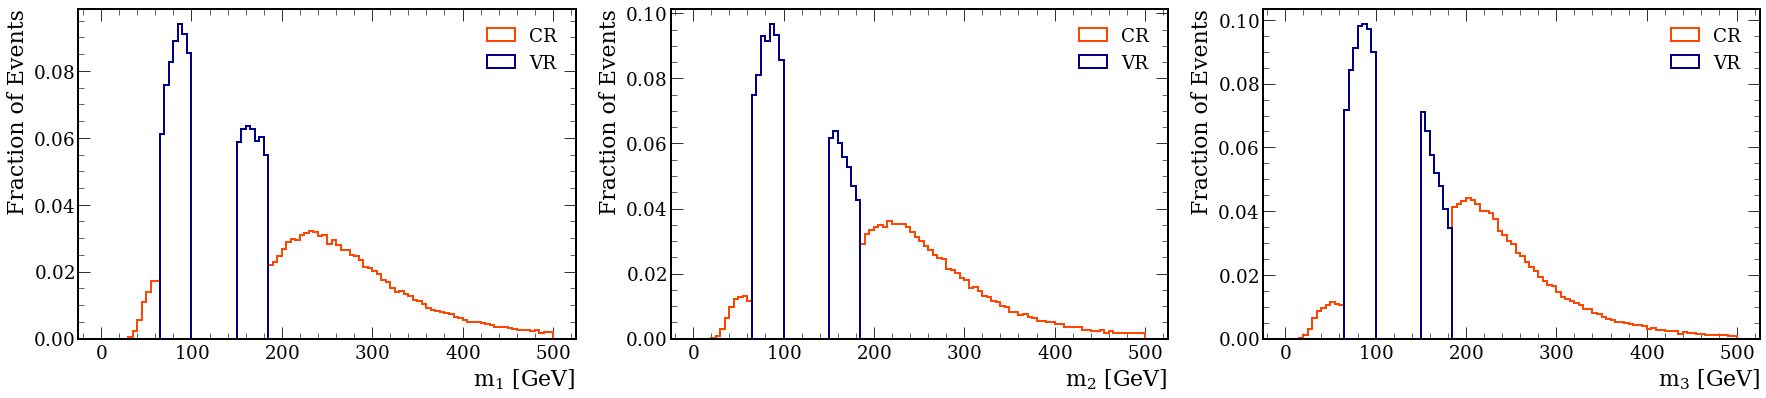

In [49]:
mH_bins = np.linspace(0,500,101)
fig, axs = plt.subplots(figsize=(25,6), nrows=1, ncols=3)

ax = axs[0]
n_CR, b = Hist(datTree.t6_higgs_m[:,0][dat_CR], bins=mH_bins, ax=ax, color='orangered', density=1, label='CR')
n_VR, b = Hist(datTree.t6_higgs_m[:,0][dat_VR], bins=mH_bins, ax=ax, color='darkblue', density=1, label='VR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel(r'$m_1$ [GeV]')
ax.set_ylabel('Fraction of Events')
# print(n_s.sum()/np.sqrt(n_b.sum()))

ax = axs[1]
n_CR, b = Hist(datTree.t6_higgs_m[:,1][dat_CR], bins=mH_bins, ax=ax,color='orangered', density=1, label='CR')
n_VR, b = Hist(datTree.t6_higgs_m[:,1][dat_VR], bins=mH_bins, ax=ax,color='darkblue', density=1, label='VR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel(r'$m_2$ [GeV]')
ax.set_ylabel('Fraction of Events')

ax = axs[2]
n_s, b = Hist(datTree.t6_higgs_m[:,2][dat_CR], bins=mH_bins, ax=ax, color='orangered', density=1, label='CR')
n_s, b = Hist(datTree.t6_higgs_m[:,2][dat_VR], bins=mH_bins, ax=ax, color='darkblue', density=1, label='VR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f'))
ax.set_xlabel(r'$m_3$ [GeV]')
ax.set_ylabel('Fraction of Events')

plt.tight_layout()

fig.savefig(f'plots/dat_mH_CRVR.pdf')

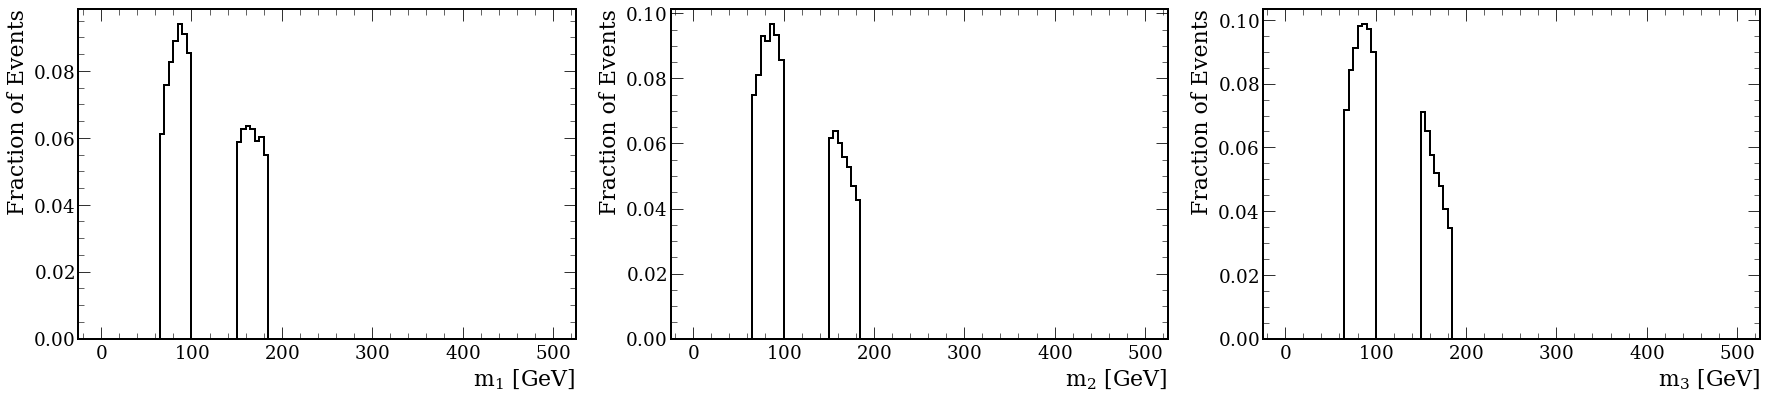

In [36]:
# mH_bins = np.linspace(0,500,101)
# fig, axs = plt.subplots(figsize=(25,6), nrows=1, ncols=3)

# ax = axs[0]
# n_CR, b = Hist(datTree.t6_higgs_m[:,0][dat_VR], bins=mH_bins, ax=ax, color='black', density=1)
# # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.set_xlabel(r'$m_1$ [GeV]')
# ax.set_ylabel('Fraction of Events')
# # print(n_s.sum()/np.sqrt(n_b.sum()))

# ax = axs[1]
# n_s, b = Hist(datTree.t6_higgs_m[:,1][dat_VR], bins=mH_bins, ax=ax,color='black', density=1)
# # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.set_xlabel(r'$m_2$ [GeV]')
# ax.set_ylabel('Fraction of Events')

# ax = axs[2]
# n_s, b = Hist(datTree.t6_higgs_m[:,2][dat_VR], bins=mH_bins, ax=ax, color='black', density=1)
# # ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f'))
# ax.set_xlabel(r'$m_3$ [GeV]')
# ax.set_ylabel('Fraction of Events')

# plt.tight_layout()

# fig.savefig(f'plots/dat_mH_VR.pdf')

Investigate control region definition: sum of b-tag score.

In [17]:
sig_sums = ak.sum(sigTree.t6_jet_btag, axis=1)[sig_SR]/6
dat_sums = ak.sum(datTree.t6_jet_btag, axis=1)[dat_CR]/6

n_sig, edges = np.histogram(sig_sums.to_numpy(), bins=score_bins)
n_data, edges = np.histogram(dat_sums.to_numpy(), bins=score_bins)

In [18]:
sum6_eff = []
sum6_rej = []

for cut in edges[:-1]:
    sum6_eff.append(n_sig[edges[:-1] >= cut].sum()/n_sig.sum())
    sum6_rej.append(n_data[edges[:-1] < cut].sum()/n_data.sum())

sum6_eff = np.append(1, np.asarray(sum6_eff))
sum6_rej = np.asarray(sum6_rej)

dx = sum6_eff[:-1] - sum6_eff[1:]
auc = np.sum(sum6_rej*dx)
sum6_rej = np.append(sum6_rej, 1)

In [19]:
opt_arg = (abs(sum6_eff-auc)+abs(sum6_rej-auc)).argmin()
opt_cut = score_bins[opt_arg]
print(opt_cut)
# opt_cut = 0.64

print(f"Optimal score cut = {opt_cut}")

0.66
Optimal score cut = 0.66


0.66


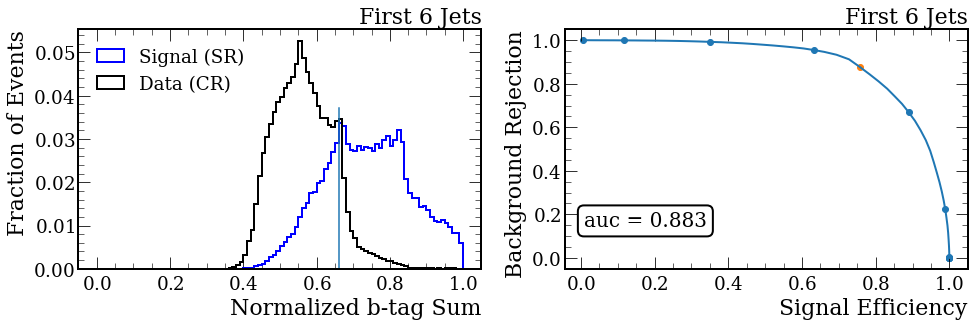

In [20]:
score_bins = np.linspace(0,1,101)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

# fig.suptitle(sigTree.sample, x=.85, y=.95)

ax = axs[0]
ax.set_title('First 6 Jets', loc='right')
n_s, edges = Hist(x_bins(score_bins), weights=n_sig/n_sig.sum(), bins=score_bins, ax=ax, label='Signal (SR)', color='blue')
n_data, edges = Hist(x_bins(score_bins), weights=n_data/n_data.sum(), bins=score_bins, ax=ax, label='Data (CR)', color='black')
ax.plot([opt_cut, opt_cut],[0,n_s.max()*1.1])
ax.legend(fontsize='smaller', loc=2)
ax.set_xlabel(r'Normalized b-tag Sum')
ax.set_ylabel('Fraction of Events')

ax = axs[1]
ax.set_title('First 6 Jets', loc='right')
ax.plot(sum6_eff, sum6_rej, linewidth=2)
ax.set_xlabel(r'Signal Efficiency')
ax.set_ylabel('Background Rejection')
dx = sum6_eff[:-1]-sum6_eff[1:]
auc = np.sum(sum6_rej[:-1]*dx)
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(0.2, 0.2, f"auc = {auc:.3f}", ha="center", va="center", transform=ax.transAxes,
            size=20,
            bbox=bbox_props)
ax.scatter(sum6_eff[::10], sum6_rej[::10])
ax.scatter(sum6_eff[opt_arg], sum6_rej[opt_arg])
print(opt_cut)

plt.tight_layout()

fig.savefig(f'plots/{sigTree.mXmY}_bsum_roc.pdf')

In [21]:
### SIGNAL ###
# score veto
sig_ls_mask = ak.sum(sigTree.t6_jet_btag, axis=1)/6 < opt_cut # ls
sig_hs_mask = ak.sum(sigTree.t6_jet_btag, axis=1)/6 >= opt_cut # hs

# combination
sig_SRhs_mask = sig_SR & sig_hs_mask
sig_SRls_mask = sig_SR & sig_ls_mask
sig_VRhs_mask = sig_VR & sig_hs_mask
sig_VRls_mask = sig_VR & sig_ls_mask
sig_CRhs_mask = sig_CR & sig_hs_mask
sig_CRls_mask = sig_CR & sig_ls_mask

#### DATA ####
# score veto
dat_ls_mask = ak.sum(datTree.t6_jet_btag, axis=1)/6 < opt_cut # ls
dat_hs_mask = ak.sum(datTree.t6_jet_btag, axis=1)/6 >= opt_cut # hs

# combination
dat_CRls_mask = dat_6jNN_mask & dat_CR & dat_ls_mask
dat_CRhs_mask = dat_6jNN_mask & dat_CR & dat_hs_mask
dat_VRls_mask = dat_6jNN_mask & dat_VR & dat_ls_mask
dat_VRhs_mask = dat_6jNN_mask & dat_VR & dat_hs_mask
dat_SRls_mask = dat_6jNN_mask & dat_SR & dat_ls_mask

In [22]:
print(int(ak.sum(sig_SRls_mask)*sigTree.scale))
print(int(ak.sum(sig_SRhs_mask)*sigTree.scale))
print(int(ak.sum(sig_VRls_mask)*sigTree.scale))
print(int(ak.sum(sig_VRhs_mask)*sigTree.scale))
print(int(ak.sum(sig_CRls_mask)*sigTree.scale))
print(int(ak.sum(sig_CRhs_mask)*sigTree.scale))

607
1621
130
215
350
411


In [23]:
TF = ak.sum(dat_CRhs_mask)/ak.sum(dat_CRls_mask)
TF

0.13956370396019754

In [24]:
from colorama import Fore, Style

In [25]:
print(ak.sum(dat_SRls_mask))
print(Fore.RED + str(int(ak.sum(dat_SRls_mask)*TF)) + Style.RESET_ALL)
# print(ak.sum(dat_SRhs_mask))
print(ak.sum(dat_VRls_mask))
print(ak.sum(dat_VRhs_mask))
print(ak.sum(dat_CRls_mask))
print(ak.sum(dat_CRhs_mask))

28247
3942
23008
3639
54871
7658


Transfer Factor, TF

## Use CRhs and CRls to observe variables

In [151]:
# bins = np.linspace(0,300,100)

# fig, axs = plt.subplots(figsize=(30,15),nrows=2, ncols=3)

# for i,ax in enumerate(axs.flat):
#     n, e = Hist(datTree.t6_jet_pt[dat_CRls_mask][:,i], bins=bins, ax=ax, label='CR ls', density=1, color='k')
#     n, e = Hist(datTree.t6_jet_pt[dat_CRhs_mask][:,i], bins=bins, ax=ax, label='CR hs', density=1, color='slategrey')
#     ax.set_xlabel(rf'Jet {i} $p_T$ [GeV]')
#     ax.set_ylabel('Fraction of Events')

# fig.savefig(f'plots/dat_jet_pt.pdf')

In [26]:
max_mass = 2000

In [153]:
# fig, axs = plt.subplots(figsize=(15,5), nrows=1, ncols=2)

# ax = axs[0]
# n, e = Hist(X.m[dat_CRls_mask], bins=np.linspace(0,max_mass,100), label='CR ls', ax=ax, color='k')
# n, e = Hist(X.m[dat_CRhs_mask], bins=np.linspace(0,max_mass,100), ax=ax, label='CR hs', color='slategrey')
# ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
# ax.set_ylabel('Events')

# ax = axs[1]
# n, e = Hist(X.m[dat_CRls_mask], bins=np.linspace(0,max_mass,100), label='CR ls', ax=ax, density=1, color='k')
# n, e = Hist(X.m[dat_CRhs_mask], bins=np.linspace(0,max_mass,100), ax=ax, label='CR hs', density=1, color='slategrey')
# ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
# ax.set_ylabel('Events')

# plt.tight_layout()

CRhs and CRls have similar shapes. Yay!

## Estimate sensitivity using mX

In [27]:
mX = int(sigTree.sample.split(' ')[1])
mY = int(sigTree.sample.split(' ')[4])

1618.3111463884793
1608.5264643257622
0.6%


Text(0, 1, 'Events')

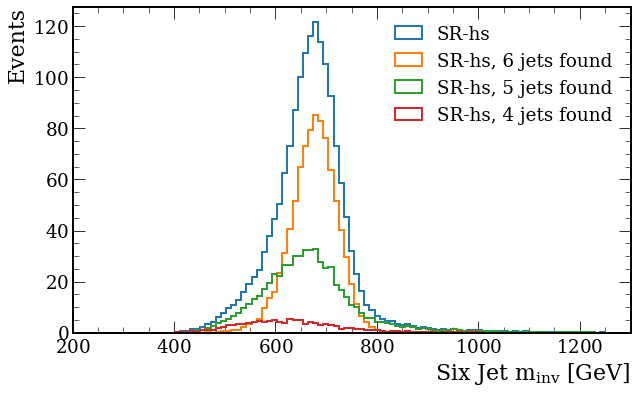

In [54]:
fig, ax = plt.subplots()

xmin = mX - 0.3*mX
xmax = mX + 0.15*mX
nbins = 100

# n_sig_SRhs, e = Hist(sig_X.m[sig_SRhs_mask], bins=np.linspace(0,max_mass,nbins), label='SR-hs', scale=sigTree.scale, ax=ax)
# S = n_sig_SRhs[(e[:-1]>xmin) & (e[:-1]<xmax)].sum()
# print("S =",S)

## How many signal jets found?
n_sig_SRhs, e = Hist(sig_X.m[sig_SRhs_mask], bins=np.linspace(250,1250,nbins), label='SR-hs', scale=sigTree.scale, ax=ax)
n, e = Hist(sig_X.m[sig_SRhs_mask & (ak.sum(sigTree.t6_jet_signalId > -1, axis=1) == 6)], bins=np.linspace(250,1250,nbins), label='SR-hs, 6 jets found', scale=sigTree.scale, ax=ax)
N = n.sum()
n, e = Hist(sig_X.m[sig_SRhs_mask & (ak.sum(sigTree.t6_jet_signalId > -1, axis=1) == 5)], bins=np.linspace(250,1250,nbins), label='SR-hs, 5 jets found', scale=sigTree.scale, ax=ax)
N += n.sum()
n, e = Hist(sig_X.m[sig_SRhs_mask & (ak.sum(sigTree.t6_jet_signalId > -1, axis=1) == 4)], bins=np.linspace(250,1250,nbins), label='SR-hs, 4 jets found', scale=sigTree.scale, ax=ax)
N += n.sum()

print(n_sig_SRhs.sum())
print(N)
print(f"{(n_sig_SRhs.sum()-N)/n_sig_SRhs.sum()*100:.1f}%")

# # how many b-jets?
# n_sig_SRhs, e = Hist(sig_X.m[sig_SRhs_mask], bins=np.linspace(250,1250,nbins), label='SR-hs', scale=sigTree.scale, ax=ax)
# n, e = Hist(sig_X.m[sig_SRhs_mask & (ak.count(sigTree.t6_jet_btag > tight_b, axis=1) == 6)], bins=np.linspace(250,1250,nbins), label='SR-hs, 6 jets found', scale=sigTree.scale, ax=ax)
# n, e = Hist(sig_X.m[sig_SRhs_mask & (ak.count(sigTree.t6_jet_btag > tight_b, axis=1) == 5)], bins=np.linspace(250,1250,nbins), label='SR-hs, 5 jets found', scale=sigTree.scale, ax=ax)
# n, e = Hist(sig_X.m[sig_SRhs_mask & (ak.count(sigTree.t6_jet_btag > tight_b, axis=1) == 4)], bins=np.linspace(250,1250,nbins), label='SR-hs, 4 jets found', scale=sigTree.scale, ax=ax)

# n_dat_SRls, e = np.histogram(X.m[dat_SRls_mask].to_numpy(), bins=np.linspace(0,max_mass,nbins))
# x = x_bins(e)
# n_dat_SRls_transformed, e = Hist(x, weights=n_dat_SRls*TF, bins=np.linspace(0,max_mass,nbins), ax=ax, label='bkg model')
# B = n_dat_SRls_transformed[(e[:-1]>xmin) & (e[:-1]<xmax)].sum()
# print(n_dat_SRls_transformed.sum())
# print("B =",B)

# ax.plot([xmin, xmin], [0, n_dat_SRls_transformed.max()], color='k', alpha=0.6)
# ax.plot([xmax, xmax], [0, n_dat_SRls_transformed.max()], color='k', alpha=0.6)

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')

# fig.savefig(f'plots/{sigTree.mXmY}_v_dat_minv6.pdf')

940.0


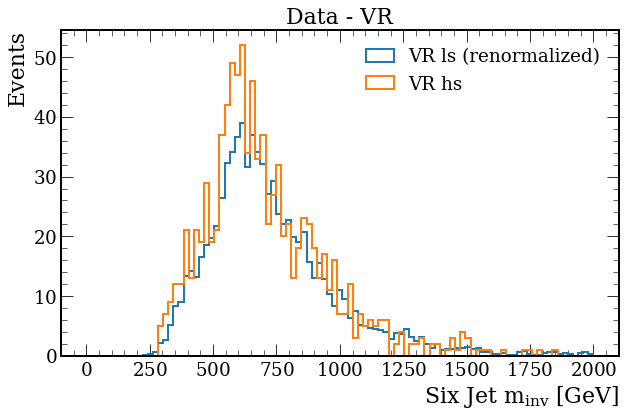

In [156]:
fig, ax = plt.subplots()#nrows=2, ncols=1, gridspec={})

ax.set_title('Data - VR')

n_VRls, e = np.histogram(X.m[dat_VRls_mask].to_numpy(), bins=np.linspace(0,max_mass,nbins))
n_VRls_transformed, e = Hist(x_bins(e), weights=n_VRls*TF, bins=np.linspace(0,max_mass,nbins), ax=ax, label='VR ls (renormalized)')
# B = n[(e[:-1]>xmin) & (e[:-1]<xmax)].sum()
n_VRhs, e = Hist(X.m[dat_VRhs_mask].to_numpy(), bins=np.linspace(0,max_mass,nbins), ax=ax, label='VR hs')
print(n_VRhs.sum())

# ax.plot([xmin, xmin], [0, n.max()], color='k', alpha=0.6)
# ax.plot([xmax, xmax], [0, n.max()], color='k', alpha=0.6)

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')

fig.savefig(f'plots/{sigTree.mXmY}_data_VRls_v_VRhs.pdf')

In [157]:
import ROOT
from array import array

Data 1078.2436887716656
Signal 1082.1858361366249


Warning in <TROOT::Append>: Replacing existing TH1: h_dat (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_sig (Potential memory leak).
Info in <TCanvas::Print>: pdf file plots/mX_700_mY_400_SR.pdf has been created


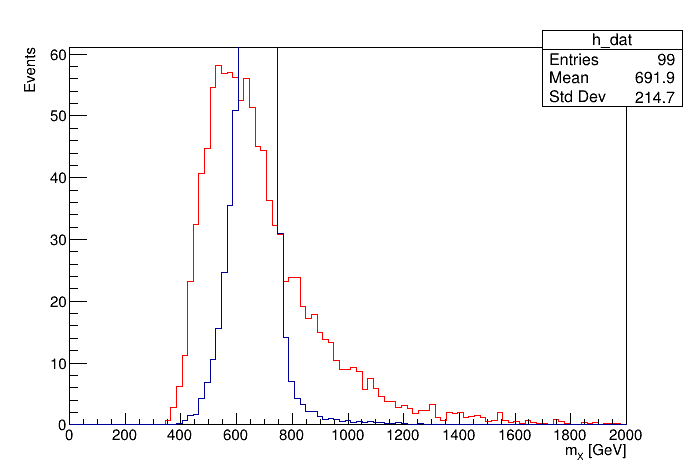

In [158]:
canvas = ROOT.TCanvas()

h_dat = ROOT.TH1D("h_dat",";m_{X} [GeV];Events",len(n_dat_SRls_transformed),array('d',list(e)))
h_sig = ROOT.TH1D("h_sig",";m_{X} [GeV];Events",len(n_sig_SRhs),array('d',list(e)))

for i,(bin_sig,bin_dat) in enumerate(zip(n_sig_SRhs, n_dat_SRls_transformed)):
    h_dat.SetBinContent(i+1, bin_dat)
    h_sig.SetBinContent(i+1, bin_sig)

h_dat.Draw()
h_sig.Draw("same")
h_dat.SetLineColor(2)
canvas.Draw()
print("Data",h_dat.Integral())
print("Signal",h_sig.Integral())

canvas.Print(f"plots/{sigTree.mXmY}_SR.pdf)","Title:Signal Region");

fout = ROOT.TFile("mass_info/{sigTree.mXmY}_mX.root","recreate")
fout.cd()
h_dat.Write()
h_sig.Write()
fout.Close()

In [159]:
sigTree.mXmY

'mX_700_mY_400'

In [160]:
sigma = 2*np.sqrt(B)
mu = 2*np.sqrt(B)/S
sensitivity = sigTree.xsec*mu

In [161]:
print(sigTree.mXmY)
print(f"    Number of signal events = {int(S)}")
print(f"Number of background events = {int(B)}")
print(f"    Standard Deviation of B = {int(sigma)}")
print(f"                         mu = {mu:.3f}")
print(f"                      limit = {sensitivity:.3f} pb")

mX_700_mY_400
    Number of signal events = 1045
Number of background events = 678
    Standard Deviation of B = 52
                         mu = 0.050
                      limit = 0.015 pb


In [162]:
lines = [
    sigTree.mXmY + '\n',
    f"    Number of signal events = {int(S)}\n",
    f"Number of background events = {int(B)}\n",
    f"    Standard Deviation of B = {int(sigma)}\n",
    f"                         mu = {mu:.3f}\n",
    f"                      limit = {sensitivity:.3f} pb"]

In [163]:
with open(f"mass_info/{sigTree.mXmY}.txt","w") as f:
    f.writelines(lines)